In [16]:
#! pip install gluonts

In [2]:
import pandas as pd
url = "https://raw.githubusercontent.com/numenta/NAB/master/data/realTweets/Twitter_volume_AMZN.csv"
df = pd.read_csv(url, header=0, index_col=0)
df.head(10)

,value
timestamp,
2015-02-26 21:42:53,57
2015-02-26 21:47:53,43
2015-02-26 21:52:53,55
2015-02-26 21:57:53,64
2015-02-26 22:02:53,93
2015-02-26 22:07:53,104
2015-02-26 22:12:53,89
2015-02-26 22:17:53,87
2015-02-26 22:22:53,57


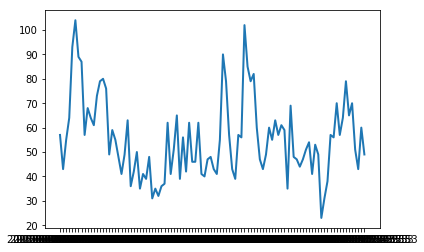

In [9]:
import matplotlib.pyplot as plt
plt.plot(df[:100],linewidth=2)
plt.show()

In [11]:
from gluonts.dataset.common import ListDataset
training_data = ListDataset(
    [{"start": df.index[0], "target": df.value[:"2015-04-05 00:00:00"]}],
    freq = "5min"
)

In [12]:
from gluonts.model.deepar import DeepAREstimator
from gluonts.trainer import Trainer

estimator = DeepAREstimator(freq="5min", prediction_length=12, trainer=Trainer(epochs=10))
predictor = estimator.train(training_data=training_data)

INFO:root:Start model training
INFO:root:Number of parameters in DeepARTrainingNetwork: 13463
INFO:root:Epoch[0] Learning rate is 0.001
100%|██████████| 100/100 [00:09<00:00, 10.05it/s, avg_epoch_loss=4.23]
INFO:root:Epoch[0] Elapsed time 9.955 seconds
INFO:root:Epoch[0] Evaluation metric 'epoch_loss'=4.232335
INFO:root:Epoch[1] Learning rate is 0.001
100%|██████████| 100/100 [00:10<00:00,  9.60it/s, avg_epoch_loss=4.01]
INFO:root:Epoch[1] Elapsed time 10.421 seconds
INFO:root:Epoch[1] Evaluation metric 'epoch_loss'=4.012491
INFO:root:Epoch[2] Learning rate is 0.001
100%|██████████| 100/100 [00:09<00:00, 11.00it/s, avg_epoch_loss=3.97]
INFO:root:Epoch[2] Elapsed time 9.095 seconds
INFO:root:Epoch[2] Evaluation metric 'epoch_loss'=3.965309
INFO:root:Epoch[3] Learning rate is 0.001
100%|██████████| 100/100 [00:09<00:00, 10.13it/s, avg_epoch_loss=3.95]
INFO:root:Epoch[3] Elapsed time 9.878 seconds
INFO:root:Epoch[3] Evaluation metric 'epoch_loss'=3.953564
INFO:root:Epoch[4] Learning rate 

/home/rubens/anaconda3/lib/python3.6/site-packages/gluonts/dataset/util.py:84: FutureWarning: Creating a DatetimeIndex by passing range endpoints is deprecated.  Use `pandas.date_range` instead.
  index = pd.DatetimeIndex(start=start, periods=len(target), freq=freq)


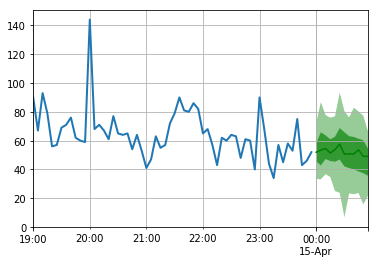

In [15]:
test_data = ListDataset(
    [{"start": df.index[0], "target": df.value[:"2015-04-15 00:00:00"]}],
    freq = "5min"
)

from gluonts.dataset.util import to_pandas

for test_entry, forecast in zip(test_data, predictor.predict(test_data)):
    to_pandas(test_entry)[-60:].plot(linewidth=2)
    forecast.plot(color='g', prediction_intervals=[50.0, 90.0])
plt.grid(which='both')